In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [8]:
from sklearn.preprocessing import StandardScaler
# Предобработка данных
from sklearn.svm import SVR
# Метод опорных векторов

## Загрузка данных из файла (второй и третий столбец)

In [10]:
dataset = pd.read_csv('Downloads/Wells_Debit.csv')

In [11]:
dataset.head()

,Well Name,Level,Debit
0,First,1,45000
1,Second,2,50000
2,Third,3,60000
3,Fourth,4,80000
4,Fifth,5,110000


In [12]:
X = dataset.iloc[:, 1:2].values
Y = dataset.iloc[:, 2].values

In [13]:
X.T

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]], dtype=int64)

In [14]:
Y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

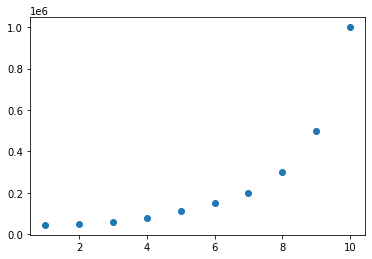

In [15]:
plt.scatter(X,Y)

## Нормировка данных

In [18]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
print(X.T)

[[-1.5666989  -1.21854359 -0.87038828 -0.52223297 -0.17407766  0.17407766
   0.52223297  0.87038828  1.21854359  1.5666989 ]]


In [19]:
Y.reshape(-1,1).T

array([[  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000]], dtype=int64)

In [23]:
sc_Y = StandardScaler()
Y = sc_Y.fit_transform(Y.reshape(-1,1))
print(Y.T)

[[-0.72004253 -0.70243757 -0.66722767 -0.59680786 -0.49117815 -0.35033854
  -0.17428902  0.17781001  0.88200808  2.64250325]]


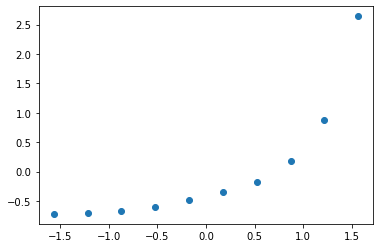

In [24]:
plt.scatter(X,Y.T)

## Метод опорных векторов

In [26]:
SVM_regressor = SVR(kernel = 'rbf')
SVM_regressor.fit(X, Y.T[0])

SVR()

## Прогноз значения дебита

In [29]:
X_ = sc_X.transform(np.array([[12.0]]))

In [30]:
Y_pred = sc_Y.inverse_transform(SVM_regressor.predict(X_))

In [31]:
print(Y_pred)

[0.74590557]


## Визуализация прогноза

#### В нормализованных значениях

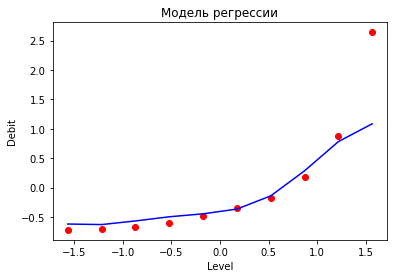

In [34]:
plt.scatter(X, Y, color = 'red')
plt.plot(X, SVM_regressor.predict(X), color = 'blue')
plt.title('Модель регрессии')
plt.xlabel('Level')
plt.ylabel('Debit')
plt.show()

#### В исходных значениях

In [39]:
X_real = sc_X.inverse_transform(X)
y_real = sc_Y.inverse_transform(Y)
X_predict_real = sc_Y.inverse_transform(SVM_regressor.predict(X))


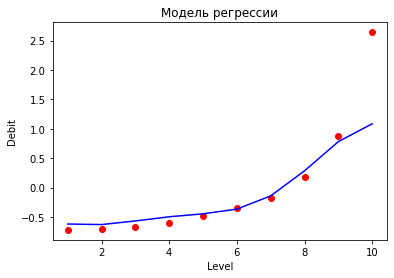

In [40]:
plt.scatter(X_real, y_real, color = 'red')
plt.plot(X_real, X_predict_real, color = 'blue')
plt.title('Модель регрессии')
plt.xlabel('Level')
plt.ylabel('Debit')
plt.show()